In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/home/guha/Ecommerce.csv')

In [2]:
df.columns


Index(['Email', 'Address', 'Avatar', 'Avg Session Length', 'Time on App',
       'Time on Website', 'Subscription Membership', 'Length of Membership',
       'Yearly Amount Spent', 'Churned'],
      dtype='object')

In [3]:
def missing_values_table(df):
     
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)      
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    return mis_val_table_ren_columns

In [4]:
def plot_var(col_name, full_name, continuous):

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
   
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    if continuous:
        sns.boxplot(x=col_name, y='Churned', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name)
    else:
        Charged_Off_rates = df.groupby(col_name)['ch'].value_counts(normalize=True)[:,1]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction churned')
        ax2.set_title('churned Rate ' )
        ax2.set_xlabel(full_name)
    
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'Churned', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='Churned', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Email                    500 non-null    object 
 1   Address                  500 non-null    object 
 2   Avatar                   500 non-null    object 
 3   Avg Session Length       500 non-null    float64
 4   Time on App              500 non-null    float64
 5   Time on Website          500 non-null    float64
 6   Subscription Membership  500 non-null    object 
 7   Length of Membership     500 non-null    float64
 8   Yearly Amount Spent      500 non-null    float64
 9   Churned                  500 non-null    object 
dtypes: float64(5), object(5)
memory usage: 39.2+ KB


In [6]:
missing_values_table(df)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


In [7]:
df.sample(5)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Subscription Membership,Length of Membership,Yearly Amount Spent,Churned
262,taylorjared@foster.net,"601 Mitchell Estates Suite 922Port Daniel, WV ...",Crimson,32.582494,11.739744,36.854811,No,2.182017,376.496841,Yes
173,fischermonica@gmail.com,9847 Michael Plaza Suite 837Lake Christophersh...,Navy,32.529769,11.747732,36.939882,No,0.801516,298.762008,Yes
184,marshchristopher@zimmerman-villegas.com,"667 Stephanie Lake Apt. 658Marthashire, NC 118...",DarkRed,33.088529,11.857663,36.086934,Yes,4.806350,577.273455,No
379,tsmith@yahoo.com,"92028 Thomas Mountains Suite 044New Matthew, M...",Bisque,33.971722,12.284467,38.295725,No,1.130477,385.095007,Yes
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692Josephbury, WV 922...",DarkSlateBlue,32.021596,11.366348,36.683776,Yes,4.685017,521.572175,No


In [8]:
df['Churned'][300]

'No'

In [9]:
df['Subscription Membership'] = df['Subscription Membership'].map(lambda x: x.strip())
df['Churned'] = df['Churned'].map(lambda x: x.strip())

In [10]:
df.sample(5)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Subscription Membership,Length of Membership,Yearly Amount Spent,Churned
96,grichardson@ryan.info,"79139 Boone CommonStewartstad, DE 63633-1812",SteelBlue,33.790387,11.942341,38.063414,Yes,4.081803,521.142952,No
371,kaylahenderson@hotmail.com,Unit 1609 Box 3480DPO AA 95185,MediumSpringGreen,32.404295,11.608998,38.110457,Yes,2.966559,447.369027,Yes
350,qeaton@savage.com,"27032 Michelle ForestMorrowtown, ND 14749",SaddleBrown,33.304337,12.692661,37.333591,Yes,3.827376,535.480775,No
190,roblessarah@hotmail.com,"022 Taylor Mews Suite 692Hallberg, NJ 53614",MediumSeaGreen,34.713317,12.038808,37.635299,Yes,4.632461,612.385230,No
325,rogersheather@hamilton-jensen.org,"510 Michele PortEast Angela, HI 23618",MintCream,33.785207,13.039511,36.312727,No,2.018195,447.187644,Yes


In [11]:
df['Subscription Membership'] = df['Subscription Membership'].map({'No':0, 'Yes':1})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Email                    500 non-null    object 
 1   Address                  500 non-null    object 
 2   Avatar                   500 non-null    object 
 3   Avg Session Length       500 non-null    float64
 4   Time on App              500 non-null    float64
 5   Time on Website          500 non-null    float64
 6   Subscription Membership  500 non-null    int64  
 7   Length of Membership     500 non-null    float64
 8   Yearly Amount Spent      500 non-null    float64
 9   Churned                  500 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 39.2+ KB


In [13]:
df.sample(5)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Subscription Membership,Length of Membership,Yearly Amount Spent,Churned
396,waltonkaren@gmail.com,"355 Villegas Isle Apt. 070West Jenniferview, N...",Green,35.742670,10.889828,35.565436,1,6.115199,669.987141,No
50,william82@gmail.com,"11143 Park SquaresSamanthatown, UT 97073",SandyBrown,33.256335,13.858062,37.780265,1,5.976768,725.584814,No
84,stevenanderson@yahoo.com,"5401 Holt Corner Apt. 195Hannahstad, NC 86693-...",LightGreen,34.655486,10.338073,36.157256,1,4.396652,533.514935,No
224,lamryan@curtis-garcia.net,"96393 Joshua RapidsJonesview, VA 58733",LavenderBlush,34.642670,11.866481,37.717771,1,4.003325,555.068394,No
27,heatherhall@yahoo.com,"8522 Regina Port Suite 782Port Kaitlin, TX 505...",MediumSlateBlue,32.335990,13.007819,37.851779,1,2.996365,486.838935,No


In [14]:
df.Churned.value_counts(normalize=True)


No     0.702
Yes    0.298
Name: Churned, dtype: float64

In [15]:
df.groupby('Avg Session Length')['Churned'].value_counts(normalize=True).loc[:,'Yes']

Avg Session Length
29.532429    1.0
30.393185    1.0
30.492537    1.0
30.574364    1.0
30.816201    1.0
            ... 
34.336677    1.0
34.338729    1.0
34.558295    1.0
34.606242    1.0
35.037450    1.0
Name: Churned, Length: 149, dtype: float64

In [16]:
df.groupby('Churned').mean()

,Avg Session Length,Time on App,Time on Website,Subscription Membership,Length of Membership,Yearly Amount Spent
Churned,,,,,,
No,33.205471,12.277521,37.070864,0.846154,3.913844,535.946804
Yes,32.694472,11.522377,37.035901,0.429530,2.637393,413.018060


In [17]:
from scipy.stats import ks_2samp
def run_KS_test(feature):
    dist1 = df.loc[df.Churned == 'No',feature]
    dist2 = df.loc[df.Churned == 'Yes',feature]
    print(feature+':')
    print(ks_2samp(dist1,dist2),'\n')
    

In [18]:
from statsmodels.stats.proportion import proportions_ztest
def run_proportion_Z_test(feature):
    dist1 = df.loc[df.Churned == 'No', feature]
    dist2 = df.loc[df.Churned == 'Yes', feature]
    n1 = len(dist1)
    p1 = dist1.sum()
    n2 = len(dist2)
    p2 = dist2.sum()
    z_score, p_value = proportions_ztest([p1, p2], [n1, n2])
    print(feature+':')
    print('z-score = {}; p-value = {}'.format(z_score, p_value),'\n')

In [19]:
from scipy.stats import chi2_contingency
def run_chi2_test(df, feature):

    dist1 = df.loc[df.Churned == 'No',feature].value_counts().sort_index().tolist()
    dist2 = df.loc[df.Churned == 'Yes',feature].value_counts().sort_index().tolist()
    chi2, p, dof, expctd = chi2_contingency([dist1,dist2])
    print(feature+':')
    print("chi-square test statistic:", chi2)
    print("p-value", p, '\n')

In [20]:
ks_list = ['Email', 'Address', 'Avatar','Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

In [21]:
z_list = ['Subscription Membership']

In [22]:
for ks_element in ks_list:
    run_KS_test(ks_element)
for z_element in z_list:
    run_proportion_Z_test(z_element)

Email:
Ks_2sampResult(statistic=0.07789823897206448, pvalue=0.5182188017643656) 

Address:
Ks_2sampResult(statistic=0.08252547849863286, pvalue=0.4450358819116791) 

Avatar:
Ks_2sampResult(statistic=0.05462819556779289, pvalue=0.8921697903565077) 

Avg Session Length:
Ks_2sampResult(statistic=0.2253006749651045, pvalue=3.7821282272365586e-05) 

Time on App:
Ks_2sampResult(statistic=0.3797204535459569, pvalue=5.495603971894525e-14) 

Time on Website:
Ks_2sampResult(statistic=0.051951280139199606, pvalue=0.9224297116105818) 

Length of Membership:
Ks_2sampResult(statistic=0.5744086885026483, pvalue=1.1102230246251565e-16) 

Yearly Amount Spent:
Ks_2sampResult(statistic=0.8879328476643913, pvalue=1.1102230246251565e-16) 

Subscription Membership:
z-score = 9.510746530925498; p-value = 1.8929911860107447e-21 



In [23]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg Session Length', 'Time on App',
       'Time on Website', 'Subscription Membership', 'Length of Membership',
       'Yearly Amount Spent', 'Churned'],
      dtype='object')

In [24]:
ks_list = ['Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

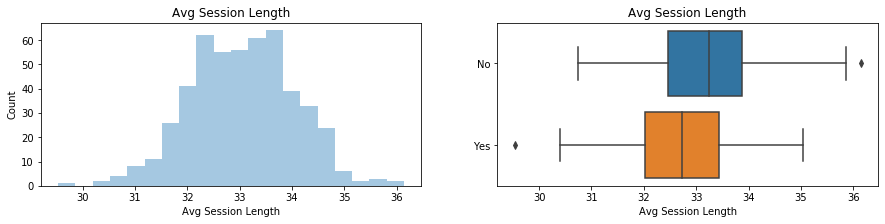

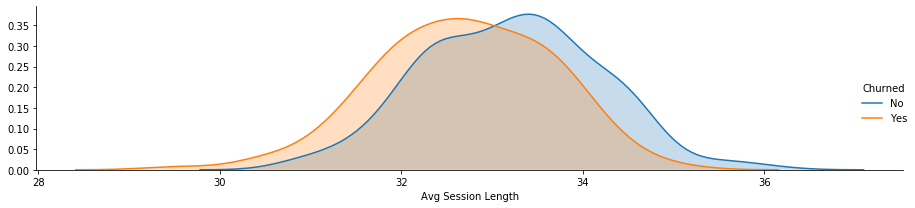

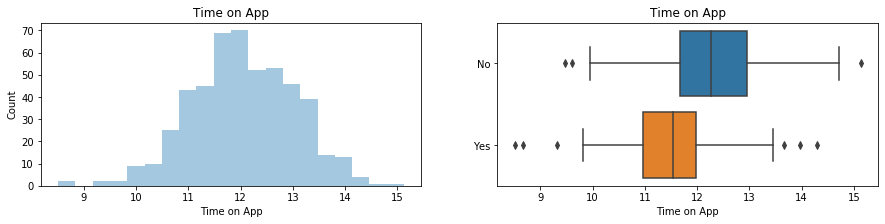

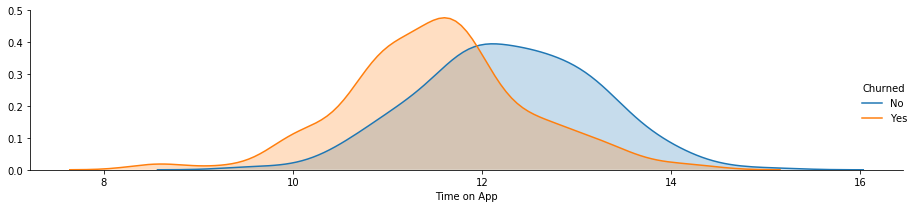

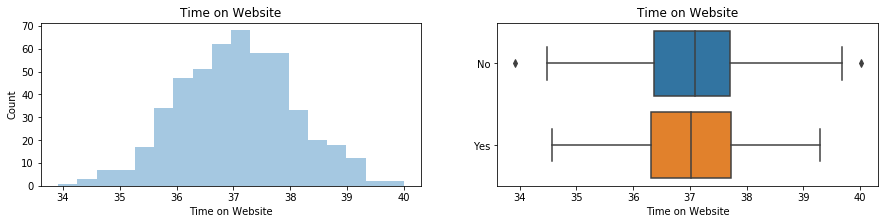

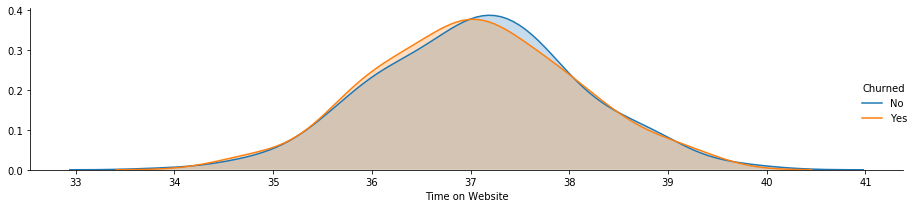

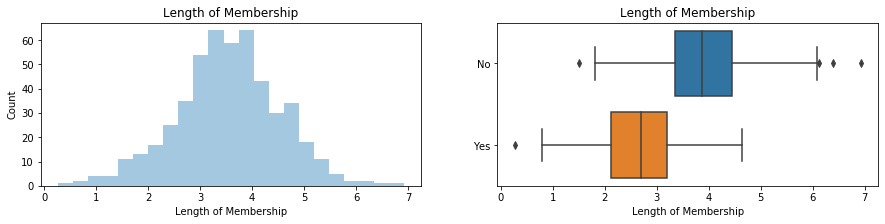

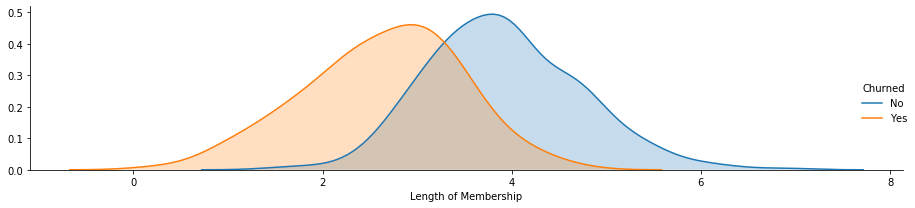

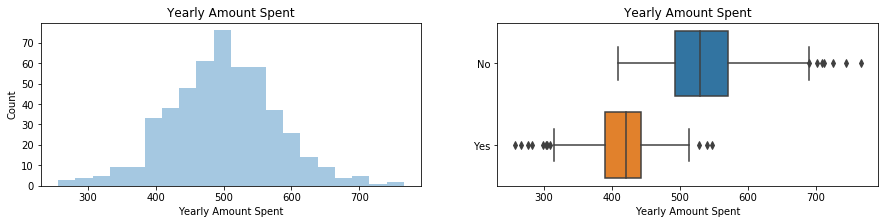

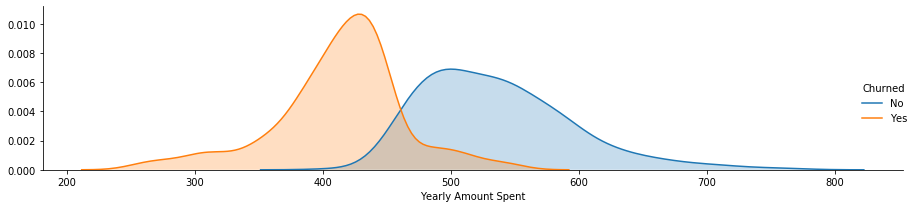

In [25]:
for plot_element in ks_list:
    plot_var(plot_element, plot_element, continuous=True)

In [26]:
#Linear Correlation
df.Churned = df.Churned.map({'No':0, 'Yes':1})

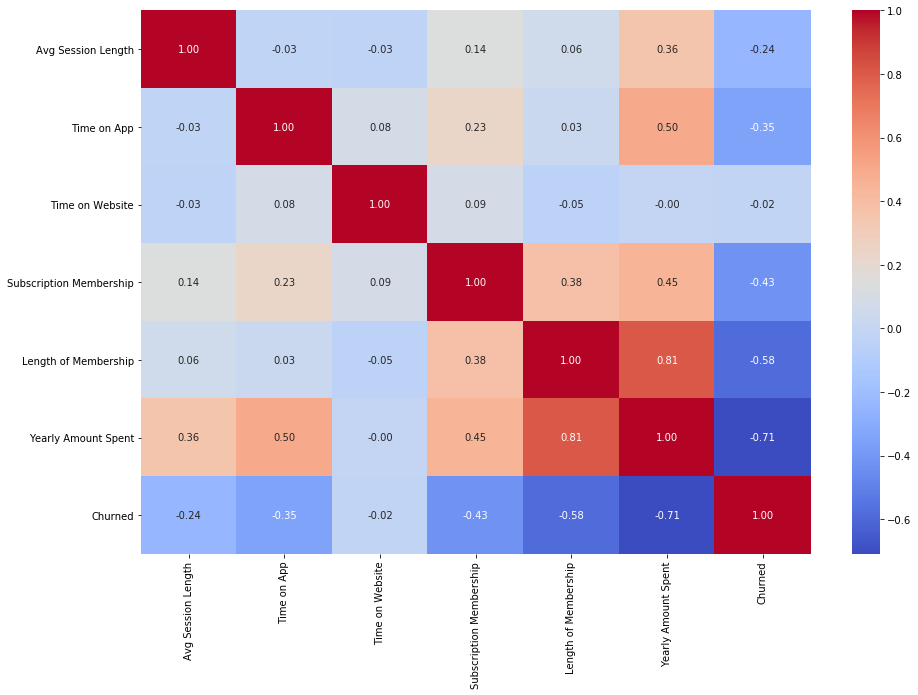

In [27]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

In [28]:
from scipy.stats import pearsonr
print(pearsonr(df['Yearly Amount Spent'],df['Length of Membership'])[0])

0.8090835682495683


In [29]:
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Subscription Membership,Length of Membership,Yearly Amount Spent,Churned
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,1,4.082621,587.951054,0
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,0,2.664034,392.204933,1
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,1,4.104543,487.547505,0
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,1,3.120179,581.852344,0
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,1,4.446308,599.406092,0


In [30]:
drop_list = ['Email','Address','Avatar','Churned']

In [31]:
X = df.drop(drop_list, axis=1)
y = df.Churned.values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X.sample(5)

,Avg Session Length,Time on App,Time on Website,Subscription Membership,Length of Membership,Yearly Amount Spent
67,32.805220,11.835476,36.375066,1,3.439591,469.310862
63,32.789773,11.670066,37.408748,1,3.414688,483.159721
406,32.865301,12.074830,35.569170,1,2.399080,411.186964
319,33.419067,13.391120,37.194191,1,4.069917,596.516698
245,32.980029,11.201160,37.689337,1,2.412831,409.070472


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

print("Feature space holds %d observations and %d features" % X_train.shape)
print("Unique target labels:", np.unique(y_train))

Feature space holds 400 observations and 6 features
Unique target labels: [0 1]


In [35]:
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import  XGBClassifier

In [36]:
kfold = StratifiedKFold(n_splits=5)

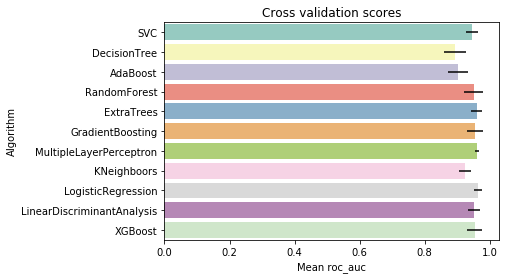

In [37]:
# Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")


In [38]:
svm = SVC(probability=True)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

grid_svm = GridSearchCV(svm, param_grid = svm_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    9.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [39]:
svm_best = grid_svm.best_estimator_
print('Best Score:', grid_svm.best_score_)
print('Best parameters set: \n', grid_svm.best_params_)

Best Score: 0.9633748917748918
Best parameters set: 
 {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}


In [40]:
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:,1]

In [41]:
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs

In [42]:
rf_best = grid_rf.best_estimator_
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 0.9676058982683982
Best parameters set: 
 {'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 7}


In [43]:
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

In [44]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors':[4,8,16],
    'weights': ['uniform','distance']
}

grid_knn = GridSearchCV(knn, param_grid = knn_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [4, 8, 16],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [45]:
knn_best = grid_knn.best_estimator_
print('Best Score:', grid_knn.best_score_)
print('Best parameters set: \n', grid_knn.best_params_)

Best Score: 0.936612067099567
Best parameters set: 
 {'n_neighbors': 16, 'weights': 'distance'}


In [46]:
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:,1]

In [47]:
lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)
lr_param_grid  = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

grid_lr = GridSearchCV(lr, lr_param_grid, scoring='roc_auc')
grid_lr.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.001     , 0.0010715...
       0.17782794, 0.19054607, 0.20417379, 0.21877616, 0.23442288,
       0.25118864, 0.26915348, 0.28840315, 0.30902954, 0.33113112,
       0.35481339, 0.3801894 , 0.40738028, 0.43651583, 0.46773514,
       0.50118723, 0.5370318 , 0.57543994, 0.616595  , 0.66069345,
       0.70794578, 

In [48]:
lr_best = grid_lr.best_estimator_
print('Best Score:', grid_lr.best_score_)
print('Best parameters set: \n', grid_lr.best_params_)

Best Score: 0.9632227272727272
Best parameters set: 
 {'C': 0.9332543007969906, 'penalty': 'l2'}


In [49]:
y_pred_lr = lr_best.predict(X_test)
y_prob_lr = lr_best.predict_proba(X_test)[:,1]

In [54]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X_train, y_train)
LRmodel_l2.coef_[0]
print("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      X_train.columns), key=lambda kv:(-abs(kv[0]),kv[1])):
    print(v + ": " + str(k))

Logistic Regression (L2) Coefficients
Yearly Amount Spent: -2.6731
Length of Membership: -1.5805
Time on App: -0.8833
Avg Session Length: -0.6818
Subscription Membership: -0.0394
Time on Website: 0.014


In [55]:
from sklearn.feature_selection import RFE
rfe_l2 = RFE(LRmodel_l2, n_features_to_select=1)
rfe_l2.fit(X_train, y_train)
print("Logistic Regression (L2) RFE Result")
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l2.ranking_), X_train.columns)):
    print(v + ": " + str(k))

Logistic Regression (L2) RFE Result
Yearly Amount Spent: 1
Length of Membership: 2
Time on App: 3
Avg Session Length: 4
Subscription Membership: 5
Time on Website: 6


In [56]:
gb = GradientBoostingClassifier(random_state=random_state)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

grid_gb = GridSearchCV(gb,param_grid = gb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_gb.fit(X_train,y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   27.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   56.8s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2...
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
   

In [57]:
gb_best = grid_gb.best_estimator_
print('Best Score:', grid_gb.best_score_)
print('Best parameters set: \n', grid_gb.best_params_)

Best Score: 0.9562280844155844
Best parameters set: 
 {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 300}


In [58]:
y_pred_gb = gb_best.predict(X_test)
y_prob_gb = gb_best.predict_proba(X_test)[:,1]

In [59]:
xgb = GradientBoostingClassifier(random_state=random_state)
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:   39.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2...
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
              

In [60]:
xgb_best = grid_xgb.best_estimator_
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 0.9610073593073594
Best parameters set: 
 {'learning_rate': 0.05, 'max_depth': 4, 'subsample': 0.25}


In [61]:
y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]

In [62]:
# print a summary of the scores
def print_grid_search_metrics(gs):
    print("Best score: %0.3f" % gs.best_score_)
    print("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

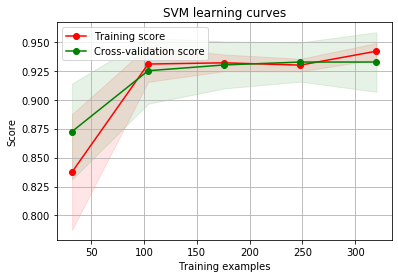

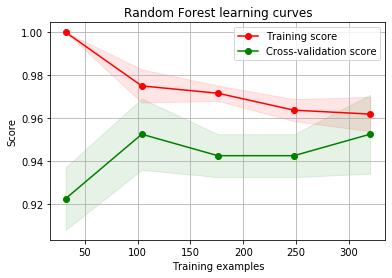

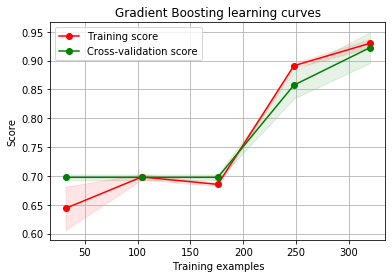

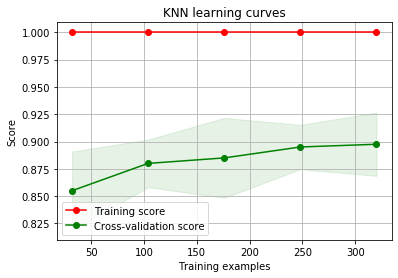

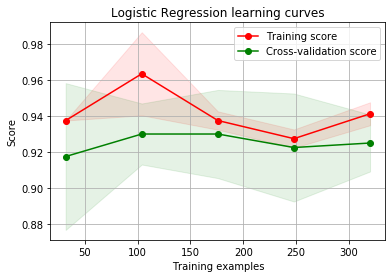

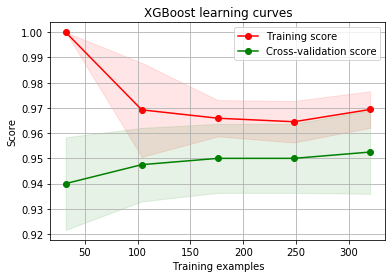

In [63]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_svm.best_estimator_,"SVM learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_gb.best_estimator_,"Gradient Boosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_knn.best_estimator_,"KNN learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_lr.best_estimator_,"Logistic Regression learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

In [66]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0 1]
Gradient Boosting
Accuracy is 0.97
Precision is 0.9310344827586207
Recall is 0.9642857142857143
F1 score is 0.9473684210526316
ROC AUC is 0.972718253968254


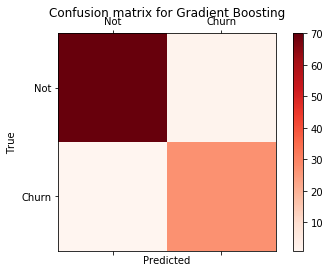

Logisitic Regression
Accuracy is 0.95
Precision is 0.8709677419354839
Recall is 0.9642857142857143
F1 score is 0.9152542372881356
ROC AUC is 0.9662698412698413


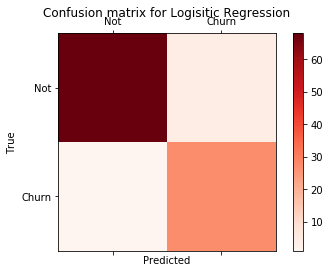

K-Nearest-Neighbors
Accuracy is 0.93
Precision is 0.92
Recall is 0.8214285714285714
F1 score is 0.8679245283018867
ROC AUC is 0.9543650793650794


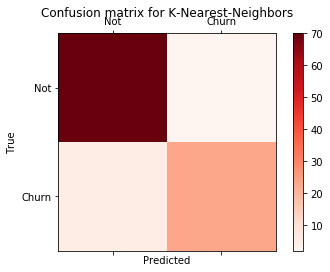

Random Forest
Accuracy is 0.96
Precision is 0.9
Recall is 0.9642857142857143
F1 score is 0.9310344827586207
ROC AUC is 0.9647817460317459


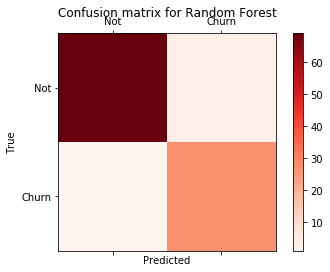

Support Vector Machine
Accuracy is 0.95
Precision is 0.8709677419354839
Recall is 0.9642857142857143
F1 score is 0.9152542372881356
ROC AUC is 0.9632936507936507


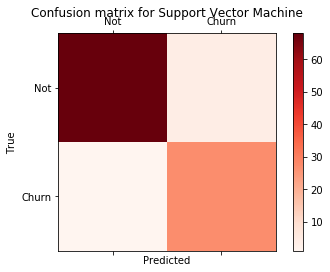

XGBoost Classifier
Accuracy is 0.96
Precision is 0.9
Recall is 0.9642857142857143
F1 score is 0.9310344827586207
ROC AUC is 0.9796626984126985


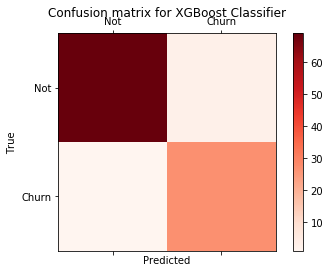

In [67]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("Gradient Boosting", confusion_matrix(y_test, y_pred_gb), roc_auc_score(y_test, y_prob_gb)),
    ("Logisitic Regression", confusion_matrix(y_test, y_pred_lr), roc_auc_score(y_test, y_prob_lr)),
    ("K-Nearest-Neighbors", confusion_matrix(y_test, y_pred_knn), roc_auc_score(y_test, y_prob_knn)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), roc_auc_score(y_test, y_prob_rf)),
    ("Support Vector Machine", confusion_matrix(y_test, y_pred_svm), roc_auc_score(y_test, y_prob_svm)),
    ("XGBoost Classifier", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
    
]

draw_confusion_matrices(confusion_matrices)

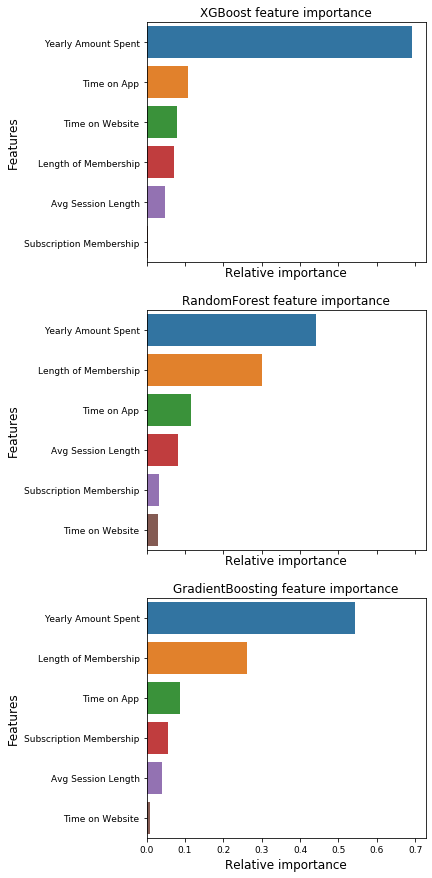

In [68]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("XGBoost", xgb_best),("RandomForest",rf_best),("GradientBoosting",gb_best),("GradientBoosting",gb_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

In [69]:
test_rf = pd.Series(rf_best.predict(X_test), name="Random Forest")
test_lr = pd.Series(lr_best.predict(X_test), name="Logistic Regression")
test_gb = pd.Series(gb_best.predict(X_test), name="Gradient Boosting")
test_knn = pd.Series(knn_best.predict(X_test), name="KNN")
test_svm = pd.Series(svm_best.predict(X_test), name="SVM")
test_xgb = pd.Series(xgb_best.predict(X_test), name="XGBoost")

frames=[test_rf, test_lr,test_gb,test_knn, test_svm, test_xgb]
ensemble_results = pd.concat(frames,axis=1)


In [70]:
ensemble_results

,Random Forest,Logistic Regression,Gradient Boosting,KNN,SVM,XGBoost
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,1,1,1,0,1,1
3,0,0,0,0,0,0
4,1,1,1,1,1,1
...,...,...,...,...,...,...
95,0,0,0,0,0,0
96,0,0,0,0,0,0
97,0,0,0,0,0,0
98,1,1,1,1,1,1


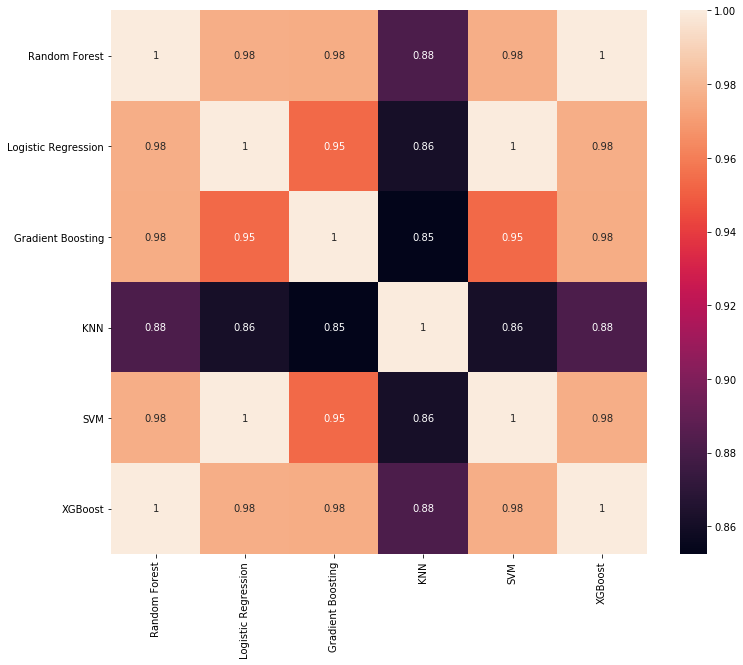

In [71]:
plt.figure(figsize=(12,10))
corr = ensemble_results.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, annot = True)

In [72]:
votingC = VotingClassifier(estimators=[('rf', rf_best), ('lr',lr_best),('knn', knn_best),
('svm', svm_best), ('gb',gb_best),('xgb',xgb_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)

In [73]:
y_pred_voting = votingC.predict(X_test)
y_prob_voting = votingC.predict_proba(X_test)[:,1]

Ensemble modeling
Accuracy is 0.96
Precision is 0.9
Recall is 0.9642857142857143
F1 score is 0.9310344827586207
ROC AUC is 0.9642857142857143


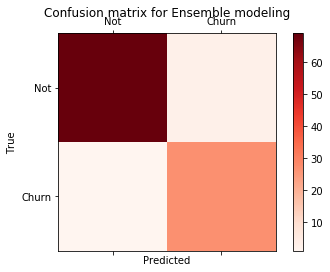

In [74]:
confusion_matrices = [
    ("Ensemble modeling", confusion_matrix(y_test, y_pred_voting), roc_auc_score(y_test, y_prob_voting))   
]
draw_confusion_matrices(confusion_matrices)

XGboost
Accuracy is 0.96
Precision is 0.9
Recall is 0.9642857142857143
F1 score is 0.9310344827586207
ROC AUC is 0.9796626984126985


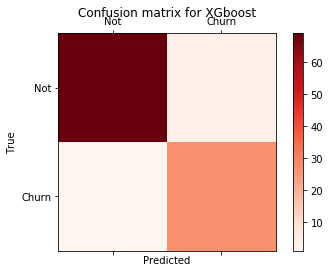

In [75]:
confusion_matrices = [
    ("XGboost", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
]

draw_confusion_matrices(confusion_matrices)

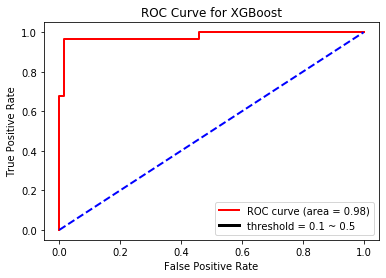

In [76]:
# make the ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_prob_xgb, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_xgb)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()


In [77]:
acc_grid = np.zeros(thresh.shape)
prec_grid = np.zeros(thresh.shape)
recall_grid = np.zeros(thresh.shape)
TP_grid = np.zeros(thresh.shape)
FP_grid = np.zeros(thresh.shape)
FN_grid = np.zeros(thresh.shape)

for i in range(thresh.shape[0]):
    cm = confusion_matrix(y_test, y_prob_xgb >= thresh[i])
    acc_grid[i] = accuracy_score(y_test, y_prob_xgb >= thresh[i])
    prec_grid[i] = precision_score(y_test, y_prob_xgb >= thresh[i])
    recall_grid[i] = recall_score(y_test, y_prob_xgb >= thresh[i])
    TP_grid[i] = cm[1][1]
    FP_grid[i] = cm[0][1]
    FN_grid[i] = cm[1][0]

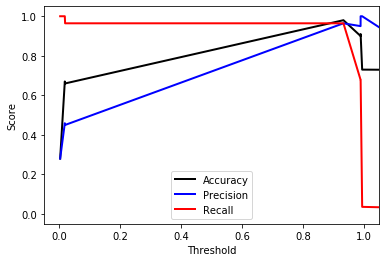

In [78]:
fig = plt.figure()
plt.plot(thresh, acc_grid, color='k', lw=2, label='Accuracy')
plt.plot(thresh, prec_grid, color='b', lw=2, label='Precision')
plt.plot(thresh, recall_grid, color='r', lw=2, label='Recall')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc="lower center")
plt.show()

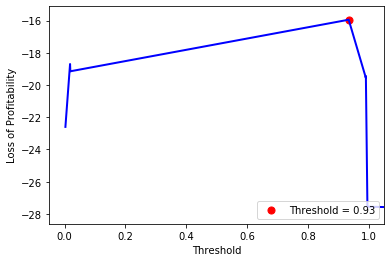

In [79]:
P = 0.5 # The chance a customer who was going to drop would take the special offer
loss = TP_grid*P*(-0.1) + TP_grid*(1-P)*(-1) + FN_grid*(-1) + FP_grid*(-0.1)
thresh_best = thresh[loss == max(loss)][0]
    
fig = plt.figure()
plt.plot(thresh, loss, color='b', lw=2)
plt.scatter([thresh_best], [max(loss)], color='r', s=50, label='Threshold = {:.2f}'.format(thresh_best))
plt.xlim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Loss of Profitability')
plt.legend(loc="lower right")
plt.show()

XGboost
Accuracy is 0.97
Precision is 0.9629629629629629
Recall is 0.9285714285714286
F1 score is 0.9454545454545454
ROC AUC is 0.9796626984126985


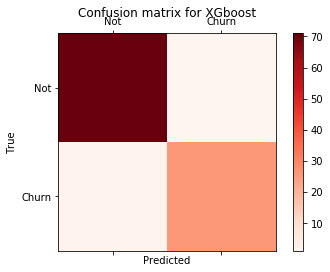

In [80]:
y_pred_xgb_new = y_prob_xgb > thresh_best

confusion_matrices = [
    ("XGboost", confusion_matrix(y_test, y_pred_xgb_new), roc_auc_score(y_test, y_prob_xgb))
]

draw_confusion_matrices(confusion_matrices)